# ZOMATO RESTAURANT PROJECT

In [ ]:
Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
In this project there are two dataset.

In [4]:
df1 = pd.read_excel("C:\\Users\\annuy\\Desktop\\Country-Code.xlsx")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [6]:
df2 = pd.read_excel("C:\\Users\\annuy\\Desktop\\zomato.xlsx")
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [7]:
df = pd.merge(df1,df2)

In [8]:
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [10]:
## # The names of all columns that are present in Dataset

df.columns


Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
# Check Shape of Dataset
df.shape

(9551, 22)

In [12]:
# Check duplicate values
df.duplicated().any()

False

In [13]:
## Checking all thr info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [14]:
# checking the description
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [16]:
# Now we will check the missing values present in the Dataset 

df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<AxesSubplot:>

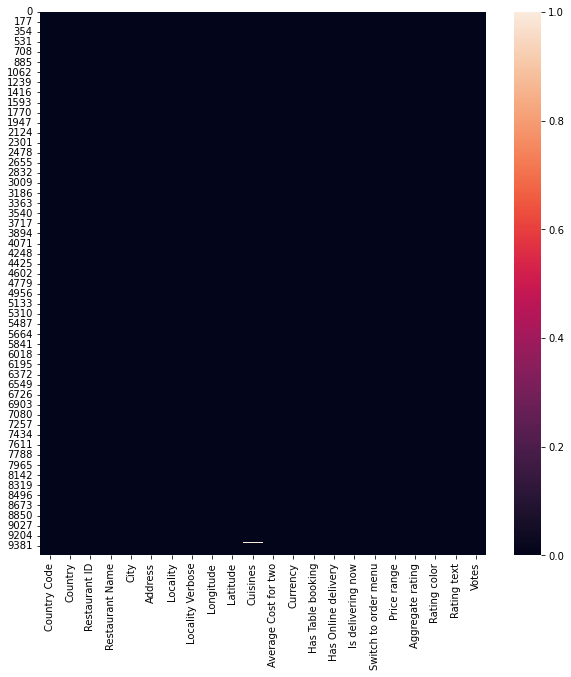

In [21]:
# Checking null values thru graph

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [22]:
df["Cuisines"]=df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [23]:
## Chekcing Null Values
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [24]:
#unique values of dataset
df.nunique()

Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [25]:
ratings = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [26]:
pd.crosstab(df['Rating text'],df['Rating color'])

Rating color,Dark Green,Green,Orange,Red,White,Yellow
Rating text,,,,,,
Average,0,0,3737,0,0,0
Excellent,301,0,0,0,0,0
Good,0,0,0,0,0,2100
Not rated,0,0,0,0,2148,0
Poor,0,0,0,186,0,0
Very Good,0,1079,0,0,0,0


In [27]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64

<AxesSubplot:xlabel='Country', ylabel='count'>

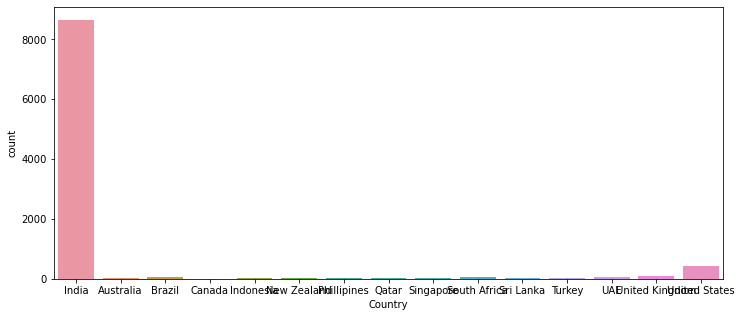

In [30]:
# Checking thru graph
plt.figure(figsize=(12,5))
sns.countplot(df["Country"])

In [ ]:
## Its alomost showing in India

In [31]:
df['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(Œ£)                  80
Brazilian Real(R$)          60
Rand(R)                     60
Emirati Diram(AED)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

<AxesSubplot:xlabel='Currency', ylabel='count'>

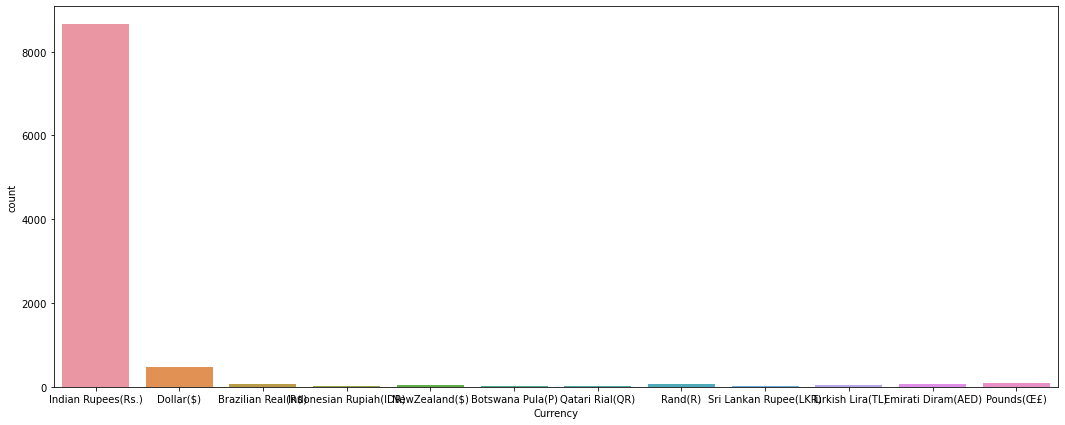

In [34]:
plt.figure(figsize=(18,7))
sns.countplot(df['Currency'])

In [36]:
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

<AxesSubplot:xlabel='Has Table booking', ylabel='count'>

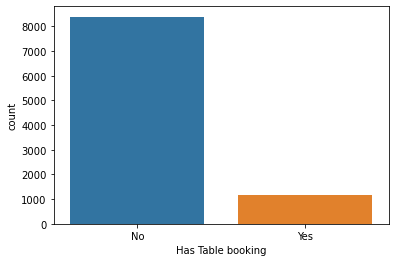

In [37]:
sns.countplot(df["Has Table booking"])

In [38]:
df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

<AxesSubplot:xlabel='Has Online delivery', ylabel='count'>

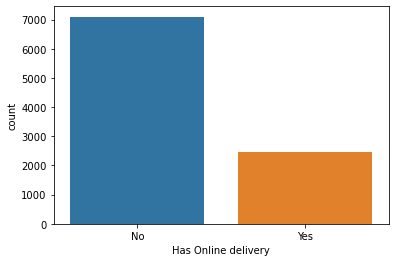

In [39]:
sns.countplot(df["Has Online delivery"])

In [40]:
df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

<AxesSubplot:xlabel='Is delivering now', ylabel='count'>

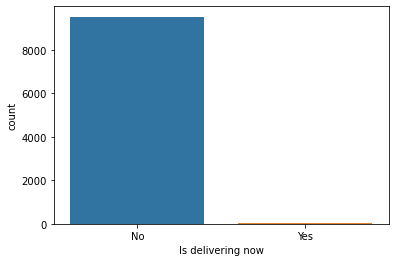

In [41]:
sns.countplot(df["Is delivering now"])

In [42]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

<AxesSubplot:xlabel='Price range', ylabel='count'>

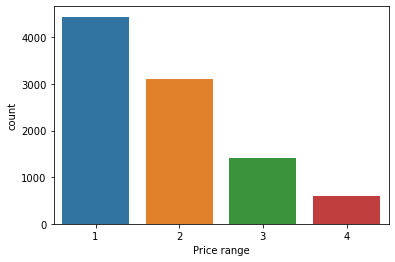

In [43]:
sns.countplot(df["Price range"])

In [44]:
df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Vineland Station       1
Yorkton                1
Bandung                1
Quezon City            1
Winchester Bay         1
Name: City, Length: 141, dtype: int64

<AxesSubplot:xlabel='Rating color', ylabel='count'>

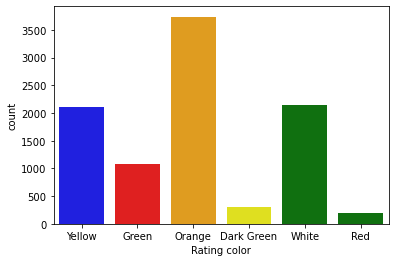

In [45]:
## Using Count Plot
sns.countplot(x="Rating color",data=df,palette=["blue","red","orange","yellow","green","green"])

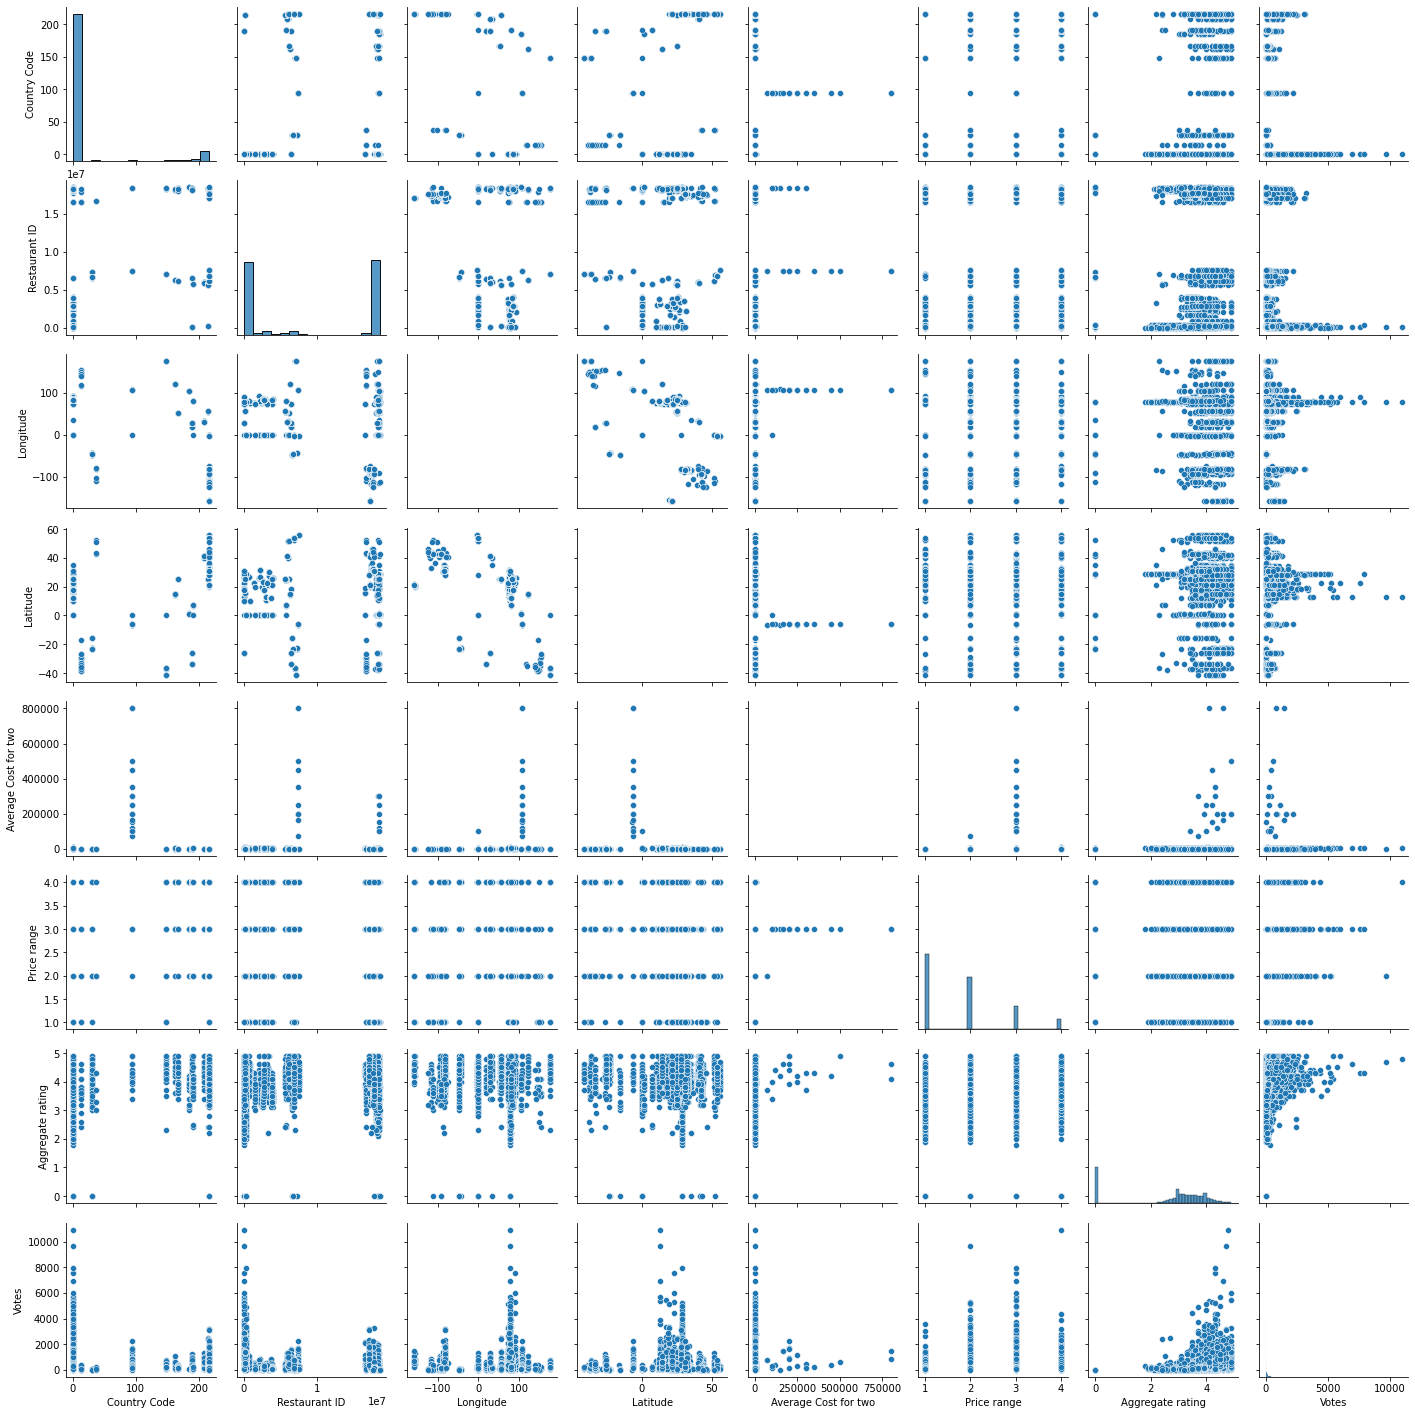

In [46]:
sns.pairplot(df)

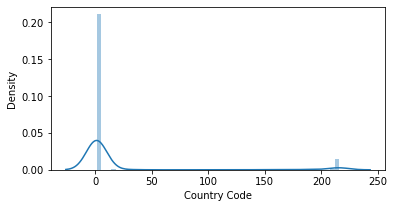

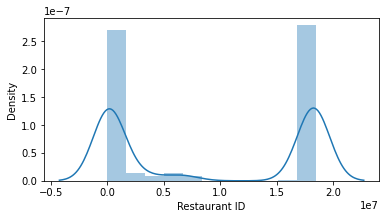

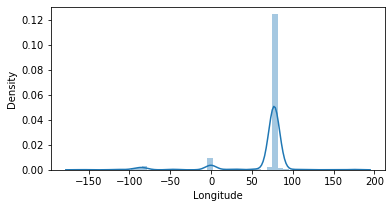

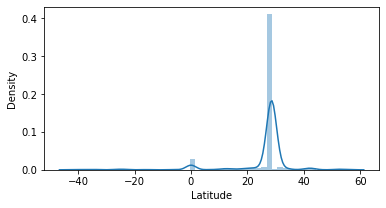

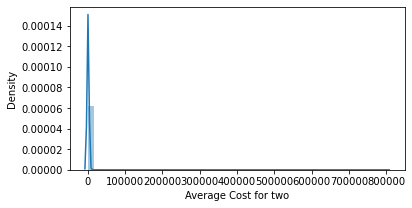

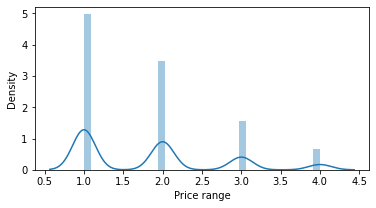

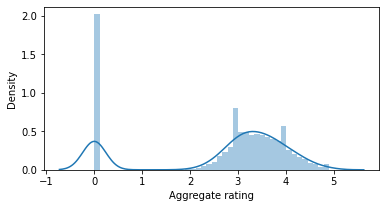

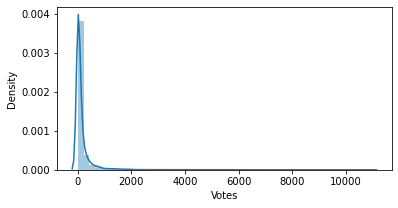

In [47]:
for i in df.columns:
    if df[i].dtypes!='object':
        plt.figure(figsize=(6,3))
        sns.distplot(df[i])

In [49]:
df.columns

Index(['Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le=LabelEncoder()

In [52]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])

In [53]:
df

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,1,17,78.011544,27.161661,1514,850,4,0,0,0,3,3.9,5,2,140
1,1,1,17,0.000000,0.000000,1514,700,4,0,0,0,2,3.5,5,2,71
2,1,1,17,78.011608,27.160832,1306,500,4,0,0,0,2,3.6,5,2,94
3,1,1,204,77.998092,27.195928,1645,400,4,0,0,0,2,4.0,1,5,87
4,1,1,204,78.007553,27.201725,1373,1000,4,0,0,0,3,4.2,1,5,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,135,1174,-92.335523,42.498400,18,10,2,0,0,0,1,3.7,5,2,101
9547,216,135,1174,-92.335769,42.497919,1795,10,2,0,0,0,1,3.5,5,2,58
9548,216,135,1174,-92.323400,42.465580,1125,25,2,0,0,0,2,3.9,5,2,156
9549,216,136,1176,-80.529488,40.396043,317,25,2,0,0,0,2,3.9,5,2,156


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   City                  9551 non-null   int32  
 2   Locality              9551 non-null   int32  
 3   Longitude             9551 non-null   float64
 4   Latitude              9551 non-null   float64
 5   Cuisines              9551 non-null   int32  
 6   Average Cost for two  9551 non-null   int64  
 7   Currency              9551 non-null   int32  
 8   Has Table booking     9551 non-null   int32  
 9   Has Online delivery   9551 non-null   int32  
 10  Is delivering now     9551 non-null   int32  
 11  Price range           9551 non-null   int64  
 12  Aggregate rating      9551 non-null   float64
 13  Rating color          9551 non-null   int32  
 14  Rating text           9551 non-null   int32  
 15  Votes                

In [55]:
df_corr=df.corr()
df_corr

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
Country Code,1.000000,-0.181728,-0.120075,-0.698299,0.019792,-0.132902,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,0.243327,0.282189,-0.187174,0.222685,0.154530
City,-0.181728,1.000000,0.096444,0.117391,-0.004301,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406
Locality,-0.120075,0.096444,1.000000,0.086448,-0.020424,0.006993,-0.012136,0.023723,-0.065594,-0.030993,-0.007299,-0.114460,-0.174336,0.036832,-0.036970,-0.123569
Longitude,-0.698299,0.117391,0.086448,1.000000,0.043207,0.126197,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101
Latitude,0.019792,-0.004301,-0.020424,0.043207,1.000000,0.038151,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962
Cuisines,-0.132902,0.026614,0.006993,0.126197,0.038151,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719
Average Cost for two,0.043225,-0.028838,-0.012136,0.045891,-0.111088,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783
Currency,-0.033466,-0.071996,0.023723,0.337334,-0.101864,0.068912,0.045615,1.000000,0.000640,0.006991,0.001458,0.075179,-0.006939,-0.040430,0.014598,-0.027111
Has Table booking,-0.061682,-0.003762,-0.065594,0.100488,0.054658,0.050639,0.007758,0.000640,1.000000,0.101224,-0.016816,0.501925,0.189998,-0.021365,0.044043,0.169422
Has Online delivery,-0.154605,0.012723,-0.030993,0.178757,0.118722,-0.016639,-0.018974,0.006991,0.101224,1.000000,0.101730,0.077918,0.225699,0.011477,-0.080937,0.074303


<AxesSubplot:>

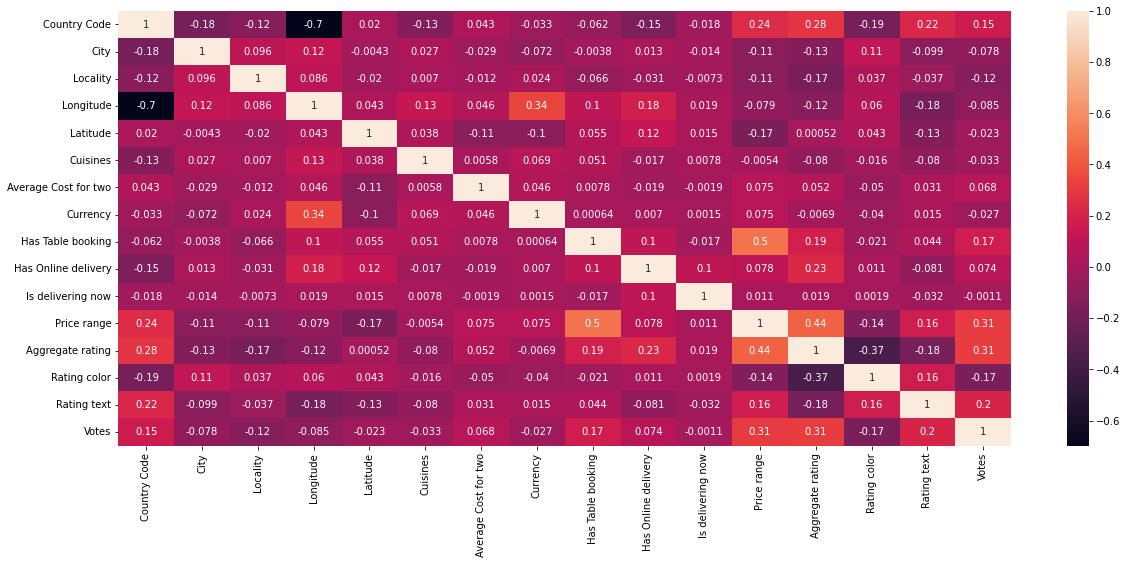

In [56]:
plt.figure(figsize=(20,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})

In [57]:
corr=df.corr()
corr['Average Cost for two'].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.075083
Votes                   0.067783
Aggregate rating        0.051792
Longitude               0.045891
Currency                0.045615
Country Code            0.043225
Rating text             0.031439
Has Table booking       0.007758
Cuisines                0.005831
Is delivering now      -0.001862
Locality               -0.012136
Has Online delivery    -0.018974
City                   -0.028838
Rating color           -0.049970
Latitude               -0.111088
Name: Average Cost for two, dtype: float64

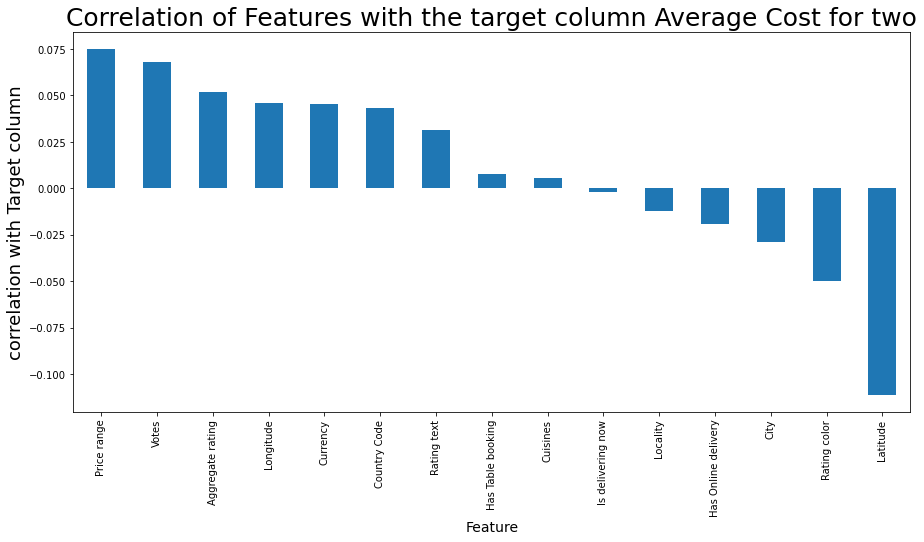

In [59]:
plt.figure(figsize=(15,7))
df.corr()["Average Cost for two"].sort_values(ascending=False).drop(["Average Cost for two"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column Average Cost for two", fontsize=25)
plt.show()

In [60]:
corr=df.corr()
corr['Price range'].sort_values(ascending=False)

Price range             1.000000
Has Table booking       0.501925
Aggregate rating        0.437944
Votes                   0.309444
Country Code            0.243327
Rating text             0.164242
Has Online delivery     0.077918
Currency                0.075179
Average Cost for two    0.075083
Is delivering now       0.010940
Cuisines               -0.005350
Longitude              -0.078939
City                   -0.105759
Locality               -0.114460
Rating color           -0.140468
Latitude               -0.166688
Name: Price range, dtype: float64

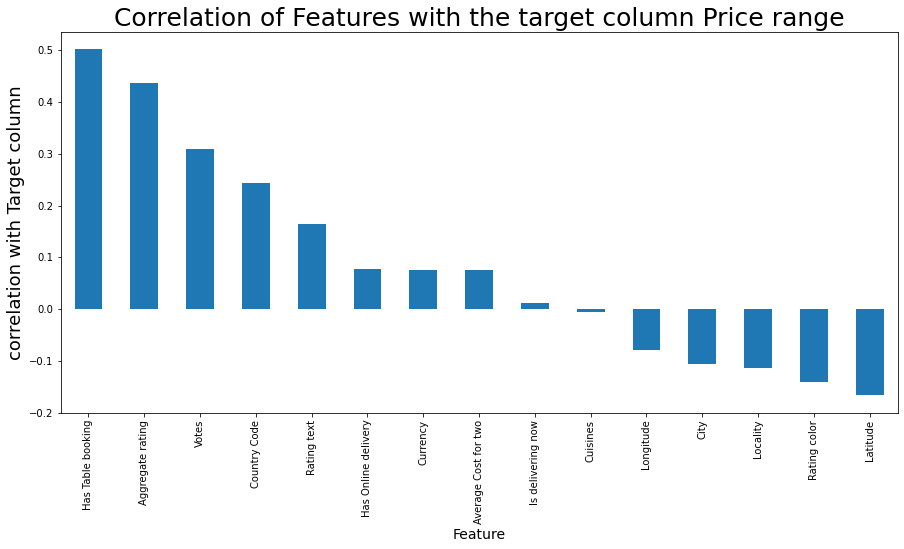

In [61]:
plt.figure(figsize=(15,7))
df.corr()["Price range"].sort_values(ascending=False).drop(["Price range"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column Price range", fontsize=25)
plt.show()


In [62]:
df.skew()

Country Code             3.043965
City                    -1.193777
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

Checking Outliers

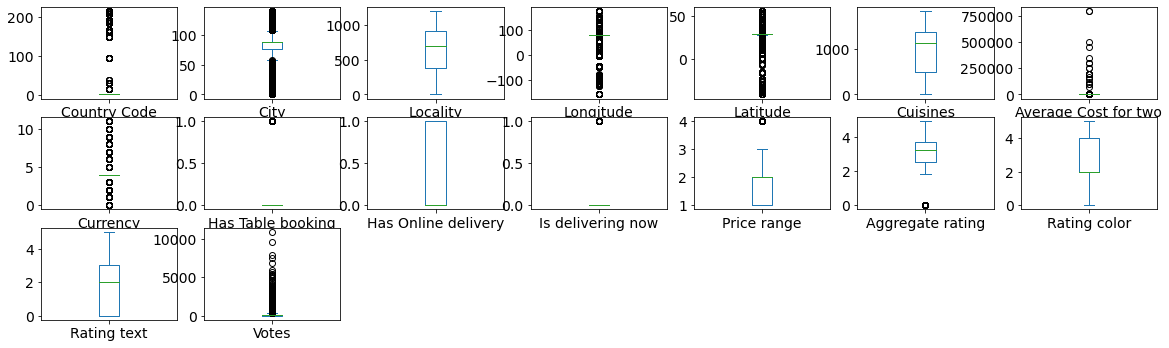

In [63]:
df.plot(kind="box", subplots=True, layout=(10,7), figsize=(20,20), fontsize=14)
plt.show()

In [64]:
from scipy.stats import zscore

In [65]:
z=np.abs(zscore(df))
z

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0.306015,3.332289,2.029851,0.334861,0.118764,1.020206,0.021663,0.024395,0.371446,0.587547,0.059771,1.319803,0.813580,1.371170,0.124686,0.039312
1,0.306015,3.332289,2.029851,1.546527,2.348827,1.020206,0.030968,0.024395,0.371446,0.587547,0.059771,0.215516,0.549780,1.371170,0.124686,0.199722
2,0.306015,3.332289,2.029851,0.334862,0.118689,0.615655,0.043374,0.024395,0.371446,0.587547,0.059771,0.215516,0.615730,1.371170,0.124686,0.146252
3,0.306015,3.332289,1.437798,0.334536,0.121877,1.274996,0.049578,0.024395,0.371446,0.587547,0.059771,0.215516,0.879530,1.308053,1.895070,0.162525
4,0.306015,3.332289,1.437798,0.334765,0.122404,0.745967,0.012358,0.024395,0.371446,0.587547,0.059771,1.319803,1.011430,1.308053,1.895070,0.046706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,3.482693,2.444146,1.633280,3.773364,1.512081,1.889455,0.073771,2.163326,0.371446,0.587547,0.059771,0.888771,0.681680,1.371170,0.124686,0.129978
9547,3.482693,2.444146,1.633280,3.773370,1.512037,1.566740,0.073771,2.163326,0.371446,0.587547,0.059771,0.888771,0.549780,1.371170,0.124686,0.229944
9548,3.482693,2.444146,1.633280,3.773071,1.509099,0.263617,0.072840,2.163326,0.371446,0.587547,0.059771,0.215516,0.813580,1.371170,0.124686,0.002115
9549,3.482693,2.487254,1.639612,3.488640,1.321086,1.307912,0.072840,2.163326,0.371446,0.587547,0.059771,0.215516,0.813580,1.371170,0.124686,0.002115


In [66]:
print(np.where(z>3))

# These points determine the point of outliers


(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64), array([1, 1, 1, ..., 3, 0, 3], dtype=int64))


In [68]:
df_new=df[(z<3).all(axis=1)]
df_new

,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
82,1,11,19,75.346017,19.876219,1338,800,4,0,0,0,3,3.6,5,2,240
83,1,11,187,0.000000,0.000000,1049,850,4,0,0,0,3,3.3,2,0,65
84,1,11,150,75.353942,19.874733,1329,600,4,0,0,0,2,3.3,2,0,63
85,1,11,150,75.340775,19.876106,1618,700,4,0,0,0,2,3.1,2,0,19
86,1,11,150,75.367127,19.875522,1554,350,4,0,0,0,2,3.4,2,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,184,118,722,103.858430,1.301707,1821,60,2,0,0,0,4,3.2,2,0,32
8859,184,118,852,103.839165,1.290084,83,95,2,0,0,0,4,3.2,2,0,30
8860,184,118,1026,103.858181,1.303035,17,50,2,0,0,0,3,3.8,5,2,28
8861,184,118,1050,103.848254,1.281970,895,40,2,0,0,0,3,3.9,5,2,35


In [69]:
# This new Dataset formed is without the outliers

In [70]:
df.shape,df_new.shape

((9551, 16), (8408, 16))

In [71]:
Data_loss=(9551-8408)/9551*100

In [72]:
Data_loss

11.967333263532614

Skewness Treatment

In [73]:
df.skew()

Country Code             3.043965
City                    -1.193777
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

In [74]:
from sklearn.preprocessing import power_transform

In [75]:
x_new=power_transform(df)
df_new=pd.DataFrame(x_new,columns=df.columns)

In [76]:
df_new.skew()

Country Code             2.780362
City                    -0.203048
Locality                -0.304129
Longitude               -0.803832
Latitude                -0.293200
Cuisines                -0.383190
Average Cost for two     0.142365
Currency                 0.448602
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.182963
Aggregate rating        -0.610806
Rating color            -0.103780
Rating text             -0.059959
Votes                   -0.004029
dtype: float64

In [77]:
df=df_new

In [78]:
df.skew()


Country Code             2.780362
City                    -0.203048
Locality                -0.304129
Longitude               -0.803832
Latitude                -0.293200
Cuisines                -0.383190
Average Cost for two     0.142365
Currency                 0.448602
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.182963
Aggregate rating        -0.610806
Rating color            -0.103780
Rating text             -0.059959
Votes                   -0.004029
dtype: float64

Splitting data into Independent Features and Dependent Features

In [80]:
x = df.drop(['Average Cost for two'],axis=1)
Y = df['Average Cost for two']

Splitting Data into training and testing set

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y, test_size = 0.2, random_state = 0)

Model Building & Evaluation

In [88]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
Linear Regression

In [89]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Linear Regression is successfully implemented")

lr_pred=lr.predict(x_test)
lr_pred

# Accuracy test
lr_accuracy=r2_score(y_test,lr_pred)
print("r2_score:- ", lr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,lr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,lr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,lr_pred)))

Linear Regression is successfully implemented
r2_score:-  69.0391582244567
mean_absolute_error:-  0.3039983116593004
mean_squared_error:-  0.28853270801144243
Root_mean_squared_error:-  0.5371524066886812


In [83]:
lr_pred=lr.predict(x_test)
lr_pred

array([ 0.90193327,  0.87210913,  0.54284456, ...,  0.45620685,
       -0.34912847,  0.77895704])

In [90]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
print("Random Forest Regressor is successfully implemented")

rfr_pred=rfr.predict(x_test)
rfr_pred

# Accuracy test
rfr_accuracy=r2_score(y_test,rfr_pred)
print("r2_score:- ", rfr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,rfr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,rfr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,rfr_pred)))

Random Forest Regressor is successfully implemented
r2_score:-  86.84612681635716
mean_absolute_error:-  0.20621969025234166
mean_squared_error:-  0.12258460793897343
Root_mean_squared_error:-  0.35012084762117984


In [92]:
from sklearn.neighbors import KNeighborsRegressor

In [94]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
print("KNeighbors Regressor is successfully implemented")

Knn_pred=knn.predict(x_test)
Knn_pred

# Accuracy test
Knn_accuracy=r2_score(y_test,Knn_pred)
print("r2_score:- ", Knn_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,Knn_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,Knn_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,Knn_pred)))


KNeighbors Regressor is successfully implemented
r2_score:-  80.71098276241932
mean_absolute_error:-  0.2675454230157747
mean_squared_error:-  0.17975972419570574
Root_mean_squared_error:-  0.4239808064001314


In [95]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print("DecisionTree Regressor is successfully implemented")

dtr_pred=dtr.predict(x_test)
dtr_pred

# Accuracy test
dtr_accuracy=r2_score(y_test,dtr_pred)
print("r2_score:- ", dtr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,dtr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,dtr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,dtr_pred)))

DecisionTree Regressor is successfully implemented
r2_score:-  79.9226260574634
mean_absolute_error:-  0.24480154484111818
mean_squared_error:-  0.1871066399097218
Root_mean_squared_error:-  0.43255825030823514


AdaBoost Regressor

In [97]:
from sklearn.ensemble import AdaBoostRegressor

In [98]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
print("AdaBoost Regressor is successfully implemented")

abr_pred=abr.predict(x_test)
abr_pred

# Accuracy test
abr_accuracy=r2_score(y_test,abr_pred)
print("r2_score:- ", abr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,abr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,abr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,abr_pred)))

AdaBoost Regressor is successfully implemented
r2_score:-  73.89166707013388
mean_absolute_error:-  0.34093572823447055
mean_squared_error:-  0.24331082651212552
Root_mean_squared_error:-  0.49326547265354537


In [102]:
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [103]:
svr=SVR()
svr.fit(x_train,y_train)
print("Support Vector Regressor is successfully implemented")

svr_pred=svr.predict(x_test)
svr_pred

# Accuracy test
svr_accuracy=r2_score(y_test,svr_pred)
print("r2_score:- ", svr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,svr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,svr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,svr_pred)))


Support Vector Regressor is successfully implemented
r2_score:-  83.07058746032206
mean_absolute_error:-  0.23428118803636536
mean_squared_error:-  0.15776991079663336
Root_mean_squared_error:-  0.3972026067344389


Extra Trees Regressor

In [104]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
print("Extra Trees Regressor is successfully implemented")

etr_pred=etr.predict(x_test)
etr_pred

# Accuracy test
etr_accuracy=r2_score(y_test,etr_pred)
print("r2_score:- ", etr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,etr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,etr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,etr_pred)))

Extra Trees Regressor is successfully implemented
r2_score:-  87.90987434209484
mean_absolute_error:-  0.2095384876462605
mean_squared_error:-  0.11267124846164757
Root_mean_squared_error:-  0.3356653816848672


In [105]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor','KNeighbors Regressor', 'AdaBoost Regressor','DecisionTree Regressor','Support Vector Regressor','Extra Trees Regressor'],
    'r2_Score': [lr_accuracy,rfr_accuracy,Knn_accuracy, abr_accuracy,dtr_accuracy,svr_accuracy,etr_accuracy]})


In [106]:
models.sort_values(['r2_Score'], ascending=[False])

,Model,r2_Score
6,Extra Trees Regressor,0.879099
1,Random Forest Regressor,0.871952
5,Support Vector Regressor,0.830706
2,KNeighbors Regressor,0.807110
4,DecisionTree Regressor,0.799226
3,AdaBoost Regressor,0.738917
0,Linear Regression,0.690392


In [107]:
from sklearn.model_selection import cross_val_score

Cross Validation 

In [108]:
scr1=cross_val_score(lr, x, Y, cv=5)
scr1

array([ 0.55324611,  0.78014936,  0.72171676,  0.7692794 , -0.68526339])

In [109]:
print("The Cross Validation Score of Linear Regression Model is :", scr1.mean())

The Cross Validation Score of Linear Regression Model is : 0.427825647809102


In [110]:
scr2=cross_val_score(rfr,x,Y,cv=5)
scr2

array([ 0.65306849,  0.85883115,  0.80785227,  0.86588515, -0.35240465])

In [111]:
print("The Cross Validation Score of Random Forest Regressor Model is :", scr2.mean())

The Cross Validation Score of Random Forest Regressor Model is : 0.56664648078153


In [112]:
scr3=cross_val_score(knn,x,Y,cv=5)
scr3

array([ 0.65253275,  0.75361868,  0.71465242,  0.73645935, -0.51191759])

In [113]:
print("The Cross Validation Score of K Neighbors Regressor Model is :", scr3.mean())

The Cross Validation Score of K Neighbors Regressor Model is : 0.46906912338738865


In [114]:
scr4=cross_val_score(dtr,x,Y,cv=5)
scr4

array([ 0.63974667,  0.74975141,  0.63880101,  0.7167    , -0.34159102])

In [115]:
print("The Cross Validation Score of Decision Tree Regressor Model is :", scr4.mean())

The Cross Validation Score of Decision Tree Regressor Model is : 0.48068161156640504


In [116]:
scr5=cross_val_score(abr,x,Y,cv=5)
scr5

array([ 0.62772786,  0.45530323,  0.06138259,  0.51153115, -0.48760392])

In [117]:
print("The Cross Validation Score of AdaBoost Regressor Model is :", scr5.mean())

The Cross Validation Score of AdaBoost Regressor Model is : 0.23366818154641603


In [118]:
scr6=cross_val_score(svr,x,Y,cv=5)
scr6

array([ 0.50907097,  0.80282011,  0.73867045,  0.79734029, -0.62608461])

In [119]:
print("The Cross Validation Score of Support Vector Regressor Model is :", scr6.mean())

The Cross Validation Score of Support Vector Regressor Model is : 0.4443634415369472


In [120]:
scr7=cross_val_score(etr,x,Y,cv=5)
scr7

array([ 0.72376355,  0.84629134,  0.79708779,  0.8588597 , -0.34026587])

In [121]:
print("The Cross Validation Score of Extra Trees Regressor Model is :", scr7.mean())

The Cross Validation Score of Extra Trees Regressor Model is : 0.5771473015928906


In [122]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor','KNeighbors Regressor','DecisionTree Regressor', 'AdaBoost Regressor','Support Vector Regressor','Extra Trees Regressor'],
    'Cross Validation': [scr1.mean(),scr2.mean(),scr3.mean(), scr4.mean(),scr5.mean(),scr6.mean(),scr7.mean()]})


In [123]:
models.sort_values(['Cross Validation'], ascending=[False])

,Model,Cross Validation
6,Extra Trees Regressor,0.577147
1,Random Forest Regressor,0.566646
3,DecisionTree Regressor,0.480682
2,KNeighbors Regressor,0.469069
5,Support Vector Regressor,0.444363
0,Linear Regression,0.427826
4,AdaBoost Regressor,0.233668


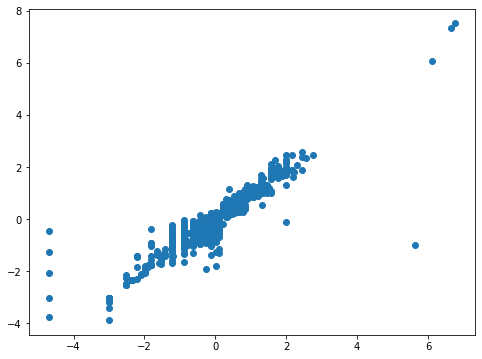

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,rfr_pred)

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
parameter={"max_depth":np.arange(2,10), 
           "criterion":["mse"],
          "min_samples_split":np.arange(2,10),
          "n_estimators":np.arange(2,10),
          "min_samples_leaf":np.arange(2,10)}

In [127]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [128]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [129]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 7}

In [130]:
final_model=RandomForestRegressor(criterion="mse", max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=9)
final_model.fit(x_train,y_train)
final_model_pred=final_model.predict(x_test)
acc=r2_score(y_test,final_model_pred)
print(acc*100)

86.76132049803218


In [131]:
import pickle
file='df Restaurant 1'
pickle.dump(rfr,open(file,'wb'))

In [132]:
load=pickle.load(open('df Restaurant 1','rb'))
result=load.score(x_test,y_test)
print(result*100)


87.19524202021347


In [133]:
conclusion=pd.DataFrame([load.predict(x_test),y_test],index=["Predicted","Original"])

In [134]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910
Predicted,0.833299,0.954492,0.368345,1.095495,-0.196023,-0.344475,-0.937163,-3.110212,0.318444,-1.981559,...,-1.772924,-0.545405,0.450615,0.378767,-1.983217,-0.082746,-0.261019,0.450249,-0.230237,0.270308
Original,0.880408,0.880408,0.533475,1.284065,0.004239,-0.426211,-1.228780,-3.009584,0.213077,-1.981559,...,-1.803038,-0.626123,0.213077,0.462336,-1.981559,-0.119352,0.004239,0.533475,-0.260745,0.533475


In [ ]:
Splitting data into Independent Features and Dependent Features

In [135]:
X = df_new.drop(['Price range'],axis=1)
y = df_new['Price range']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [137]:
## Model Building & Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [138]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print("Linear Regression is successfully implemented")

lr_pred=lr.predict(X_test)
lr_pred

# Accuracy test
lr_accuracy=r2_score(y_test,lr_pred)
print("r2_score:- ", lr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,lr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,lr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,lr_pred)))

Linear Regression is successfully implemented
r2_score:-  63.51431724767951
mean_absolute_error:-  0.4958548821604062
mean_squared_error:-  0.36668497530590644
Root_mean_squared_error:-  0.6055451884920782


In [139]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
print("Random Forest Regressor is successfully implemented")

rfr_pred=rfr.predict(X_test)
rfr_pred

# Accuracy test
rfr_accuracy=r2_score(y_test,rfr_pred)
print("r2_score:- ", rfr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,rfr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,rfr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,rfr_pred)))


Random Forest Regressor is successfully implemented
r2_score:-  99.10777651395894
mean_absolute_error:-  0.019226802295458395
mean_squared_error:-  0.008966940516564834
Root_mean_squared_error:-  0.09469393072718459


In [140]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
print("KNeighbors Regressor is successfully implemented")

Knn_pred=knn.predict(X_test)
Knn_pred

# Accuracy test
Knn_accuracy=r2_score(y_test,Knn_pred)
print("r2_score:- ", Knn_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,Knn_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,Knn_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,Knn_pred)))


KNeighbors Regressor is successfully implemented
r2_score:-  79.14064358759155
mean_absolute_error:-  0.2767949640423595
mean_squared_error:-  0.20963874084265638
Root_mean_squared_error:-  0.45786323377473365


In [141]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
print("DecisionTree Regressor is successfully implemented")

dtr_pred=dtr.predict(X_test)
dtr_pred

# Accuracy test
dtr_accuracy=r2_score(y_test,dtr_pred)
print("r2_score:- ", dtr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,dtr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,dtr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,dtr_pred)))


DecisionTree Regressor is successfully implemented
r2_score:-  98.70649897891676
mean_absolute_error:-  0.014282743980294707
mean_squared_error:-  0.01299982223695426
Root_mean_squared_error:-  0.11401676296472488


In [142]:
abr=AdaBoostRegressor()
abr.fit(X_train,y_train)
print("AdaBoost Regressor is successfully implemented")

abr_pred=abr.predict(X_test)
abr_pred

# Accuracy test
abr_accuracy=r2_score(y_test,abr_pred)
print("r2_score:- ", abr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,abr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,abr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,abr_pred)))


AdaBoost Regressor is successfully implemented
r2_score:-  95.77121028635186
mean_absolute_error:-  0.1338854950303765
mean_squared_error:-  0.042499784429121536
Root_mean_squared_error:-  0.20615475844404255


In [143]:
svr=SVR()
svr.fit(X_train,y_train)
print("Support Vector Regressor is successfully implemented")

svr_pred=svr.predict(X_test)
svr_pred

# Accuracy test
svr_accuracy=r2_score(y_test,svr_pred)
print("r2_score:- ", svr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,svr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,svr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,svr_pred)))


Support Vector Regressor is successfully implemented
r2_score:-  84.39578934312347
mean_absolute_error:-  0.2925286136389626
mean_squared_error:-  0.1568239695068067
Root_mean_squared_error:-  0.3960100623807515


In [144]:
etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)
print("Extra Trees Regressor is successfully implemented")

etr_pred=etr.predict(X_test)
etr_pred

# Accuracy test
etr_accuracy=r2_score(y_test,etr_pred)
print("r2_score:- ", etr_accuracy*100)

print("mean_absolute_error:- ",mean_absolute_error(y_test,etr_pred))
print("mean_squared_error:- ",mean_squared_error(y_test,etr_pred))
print("Root_mean_squared_error:- ",np.sqrt(mean_squared_error(y_test,etr_pred)))

Extra Trees Regressor is successfully implemented
r2_score:-  98.97070471042717
mean_absolute_error:-  0.027647085443255864
mean_squared_error:-  0.01034452665725417
Root_mean_squared_error:-  0.10170804617754767


In [145]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor','KNeighbors Regressor', 'AdaBoost Regressor','DecisionTree Regressor','Support Vector Regressor','Extra Trees Regressor'],
    'r2_Score': [lr_accuracy,rfr_accuracy,Knn_accuracy, abr_accuracy,dtr_accuracy,svr_accuracy,etr_accuracy]})

In [146]:
models.sort_values(['r2_Score'], ascending=[False])


,Model,r2_Score
1,Random Forest Regressor,0.991078
6,Extra Trees Regressor,0.989707
4,DecisionTree Regressor,0.987065
3,AdaBoost Regressor,0.957712
5,Support Vector Regressor,0.843958
2,KNeighbors Regressor,0.791406
0,Linear Regression,0.635143


In [147]:
from sklearn.model_selection import cross_val_score

In [ ]:
Cross Validation

In [148]:
scr1=cross_val_score(lr, X,y, cv=5)
scr1

array([ 0.45735401,  0.69099313,  0.62842378,  0.70538306, -3.78167992])

In [149]:
print("The Cross Validation Score of Linear Regression Model is :", scr1.mean())


The Cross Validation Score of Linear Regression Model is : -0.2599051863443275


In [150]:
scr2=cross_val_score(rfr,X,y,cv=5)
scr2

array([ 0.38725469,  0.99181808,  0.99990619,  0.99868127, -0.41154656])

In [151]:
print("The Cross Validation Score of Random Forest Regressor Model is :", scr2.mean())


The Cross Validation Score of Random Forest Regressor Model is : 0.5932227345334612


In [152]:
scr3=cross_val_score(knn,X,y,cv=5)
scr3

array([ 0.74901773,  0.71817324,  0.78057952,  0.80813356, -0.07677884])

In [153]:
print("The Cross Validation Score of K Neighbors Regressor Model is :", scr3.mean())


The Cross Validation Score of K Neighbors Regressor Model is : 0.5958250422526675


In [154]:
scr4=cross_val_score(dtr,X,y,cv=5)
scr4

array([ 0.23259471,  0.98913853,  1.        ,  0.99889923, -0.39407329])

In [155]:
print("The Cross Validation Score of Decision Tree Regressor Model is :", scr4.mean())


The Cross Validation Score of Decision Tree Regressor Model is : 0.565311834177935


In [156]:
scr5=cross_val_score(abr,X,y,cv=5)
scr5

array([ 0.88722105,  0.98038318,  0.97866039,  0.96323694, -0.32464273])

In [157]:
print("The Cross Validation Score of AdaBoost Regressor Model is :", scr5.mean())


The Cross Validation Score of AdaBoost Regressor Model is : 0.6969717673730675


In [158]:
scr6=cross_val_score(svr,X,y,cv=5)
scr6

array([0.73884565, 0.84496188, 0.81138471, 0.85098299, 0.42806576])

In [159]:
print("The Cross Validation Score of Support Vector Regressor Model is :", scr6.mean())


The Cross Validation Score of Support Vector Regressor Model is : 0.7348481965225127


In [160]:
scr7=cross_val_score(etr,x,Y,cv=5)
scr7


array([ 0.71150097,  0.84665362,  0.79812606,  0.85906963, -0.35463653])

In [161]:
print("The Cross Validation Score of Extra Trees Regressor Model is :", scr7.mean())


The Cross Validation Score of Extra Trees Regressor Model is : 0.5721427490362221


In [162]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor','KNeighbors Regressor','DecisionTree Regressor', 'AdaBoost Regressor','Support Vector Regressor','Extra Trees Regressor'],
    'Cross Validation': [scr1.mean(),scr2.mean(),scr3.mean(), scr4.mean(),scr5.mean(),scr6.mean(),scr7.mean()]})

In [163]:
models.sort_values(['Cross Validation'], ascending=[False])

,Model,Cross Validation
5,Support Vector Regressor,0.734848
4,AdaBoost Regressor,0.696972
2,KNeighbors Regressor,0.595825
1,Random Forest Regressor,0.593223
6,Extra Trees Regressor,0.572143
3,DecisionTree Regressor,0.565312
0,Linear Regression,-0.259905


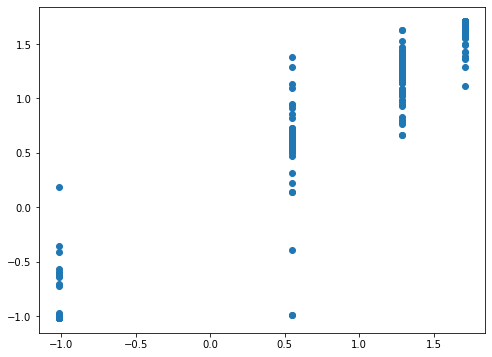

In [164]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,rfr_pred)

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
parameter={"max_depth":np.arange(2,10), 
           "criterion":["mse"],
          "min_samples_split":np.arange(2,10),
          "n_estimators":np.arange(2,10),
          "min_samples_leaf":np.arange(2,10)}


In [167]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)


In [168]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [169]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 8}

In [170]:
final_model=RandomForestRegressor(criterion="mse", max_depth=9, min_samples_leaf=2, min_samples_split=6, n_estimators=7)
final_model.fit(X_train,y_train)
final_model_pred=final_model.predict(X_test)
acc=r2_score(y_test,final_model_pred)
print(acc*100)

98.69918751940523


Saving the Random Forest Regressor Model (Serialization)

In [171]:
import pickle
file='df Restaurant 2'
pickle.dump(rfr,open(file,'wb'))

In [172]:
load=pickle.load(open('df Restaurant 2','rb'))
result=load.score(X_test,y_test)
print(result*100)

99.10777651395894


In [173]:
conclusion=pd.DataFrame([load.predict(X_test),y_test],index=["Predicted","Original"])

In [174]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910
Predicted,1.347526,1.284171,0.548245,1.284171,-1.015939,-1.015939,-1.015939,-1.015939,0.548245,1.284171,...,0.938286,-1.015939,0.548245,0.548245,1.284171,-1.015939,-1.015939,0.548245,-1.015939,0.592401
Original,1.284171,1.284171,0.548245,1.284171,-1.015939,-1.015939,-1.015939,-1.015939,0.548245,1.284171,...,0.548245,-1.015939,0.548245,0.548245,1.284171,-1.015939,-1.015939,0.548245,-1.015939,0.548245
